In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sl
import scipy.stats as ss
import seaborn as sb
import math

# Лабораторна робота 3 (Кластеризація)

In [2]:
df = pd.read_excel('data_lab3.xlsx') 
df

,Внутричерепное давление,t36,t35,t34,t33,t32
0,1,37,35,33,28,26
1,2,38,33,30,28,25
2,3,33,34,30,31,29
3,4,45,30,27,28,19
4,5,36,31,29,27,25
5,6,44,40,37,33,28
6,7,35,33,28,27,25
7,8,34,29,28,26,24
8,9,39,34,31,29,24
9,10,38,36,33,29,25


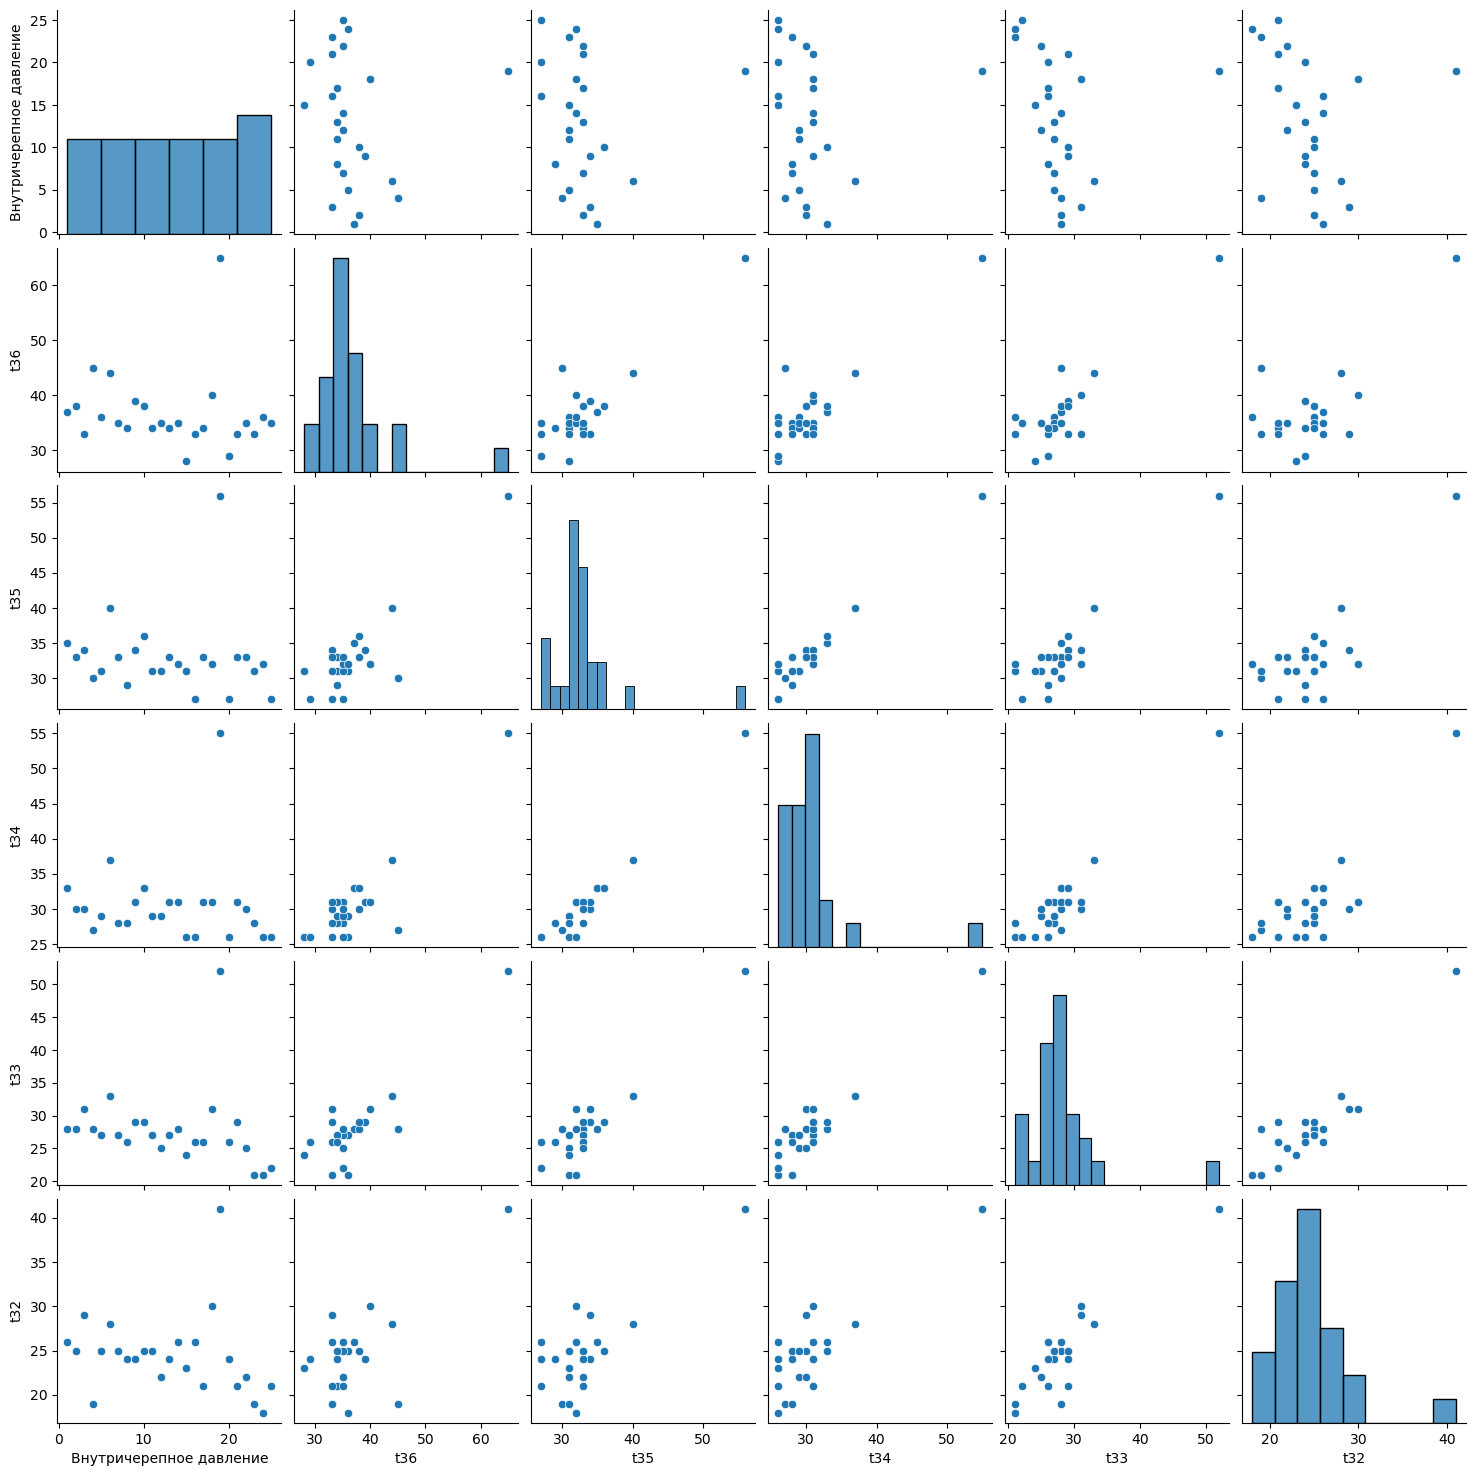

In [3]:
sb.pairplot(df)